### 압축 데이터 병합

In [1]:
import os
import pandas as pd

In [2]:
data = pd.read_csv('0828.csv')

In [3]:
data

,Time,x,y,z
0,2023.08.28 01:20:09.446,-0.008282,-0.007571,-0.007034
1,2023.08.28 01:20:09.462,-0.007666,-0.005618,-0.006488
2,2023.08.28 01:20:09.475,-0.007770,-0.004584,-0.006766
3,2023.08.28 01:20:09.475,-0.007492,-0.005890,-0.006854
4,2023.08.28 01:20:09.492,-0.007516,-0.006842,-0.007455
...,...,...,...,...
8839006,2023.08.29 01:53:35.158,-0.008926,-0.007025,-0.011603
8839007,2023.08.29 01:53:35.170,-0.008154,-0.005743,0.049307
8839008,2023.08.29 01:53:35.171,-0.008026,-0.006183,-0.029788
8839009,2023.08.29 01:53:35.191,-0.006598,-0.007840,-0.021387


### 시각화

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

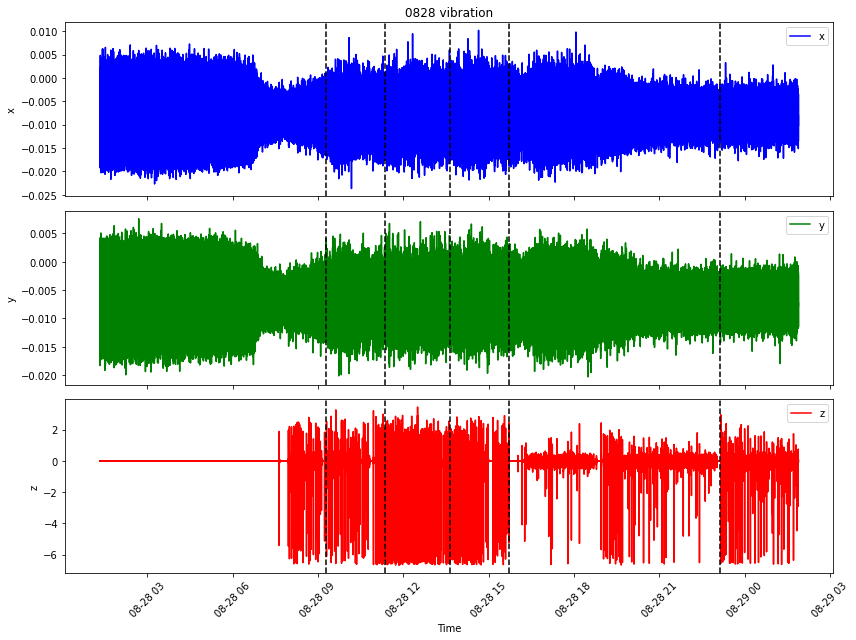

In [5]:
data['Time'] = pd.to_datetime(data['Time'], format='%Y.%m.%d %H:%M:%S.%f')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

ax1.plot(data['Time'], data['x'], label='x', color='blue')
ax1.set_ylabel('x')
ax1.set_title('0828 vibration')
ax1.legend()

ax2.plot(data['Time'], data['y'], label='y', color='green')
ax2.set_ylabel('y')
ax2.legend()

ax3.plot(data['Time'], data['z'], label='z', color='red')
ax3.set_xlabel('Time')
ax3.set_ylabel('z')
ax3.legend()

red_lines = [
    "2023-08-28 23:08:00",
    "2023-08-28 15:42:00",
    "2023-08-28 13:39:00",
    "2023-08-28 11:21:00",
    "2023-08-28 09:17:00"
]

for line in red_lines:
    line_time = pd.to_datetime(line, format='%Y-%m-%d %H:%M:%S')
    ax1.axvline(x=line_time, color='black', linestyle='--')
    ax2.axvline(x=line_time, color='black', linestyle='--')
    ax3.axvline(x=line_time, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
#c['Time'] = pd.to_datetime(c['Time'], format='%Y.%m.%d %H:%M:%S.%f')

target_times = ['2023.08.28 09:16:59.994','2023.08.28 11:21:00.005','2023.08.28 13:39:00.000', '2023.08.28 15:42:00.004',
'2023.08.28 23:08:00.002']

indices = [data.index[data['Time'] == time].tolist() for time in target_times]

for i, index_list in enumerate(indices):
    print(f"{target_times[i]}의 위치: {index_list}")

2023.08.28 09:16:59.994의 위치: [2863942]
2023.08.28 11:21:00.005의 위치: [3608693]
2023.08.28 13:39:00.000의 위치: [4437528]
2023.08.28 15:42:00.004의 위치: [5176273, 5176274]
2023.08.28 23:08:00.002의 위치: [7854973]


### Z축 위주로

In [7]:
z = data.drop(['x', 'y'], axis=1)
z

,Time,z
0,2023-08-28 01:20:09.446,-0.007034
1,2023-08-28 01:20:09.462,-0.006488
2,2023-08-28 01:20:09.475,-0.006766
3,2023-08-28 01:20:09.475,-0.006854
4,2023-08-28 01:20:09.492,-0.007455
...,...,...
8839006,2023-08-29 01:53:35.158,-0.011603
8839007,2023-08-29 01:53:35.170,0.049307
8839008,2023-08-29 01:53:35.171,-0.029788
8839009,2023-08-29 01:53:35.191,-0.021387


In [30]:
before_1542 = z.iloc[4437529:5176273,:]
after_1542 = z.iloc[5176273:7854973,:]
before_2308 = z.iloc[5176273:7854973,:]
after_2308 = z.iloc[7854973:8839011,:]

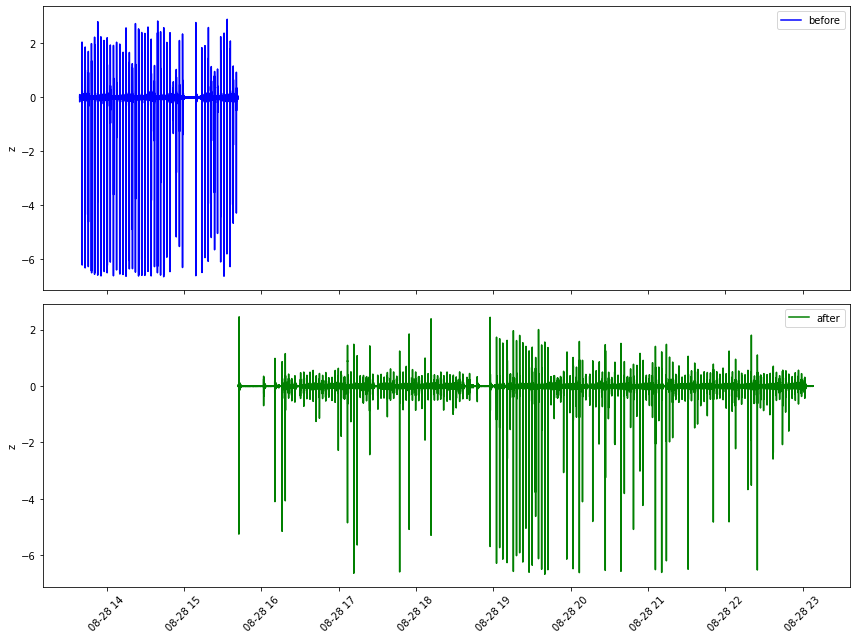

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

ax1.plot(before_1542['Time'], before_1542['z'], label='before', color='blue')
ax1.set_ylabel('z')
ax1.legend()

ax2.plot(after_1542['Time'], after_1542['z'], label='after', color='green')
ax2.set_ylabel('z')
ax2.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

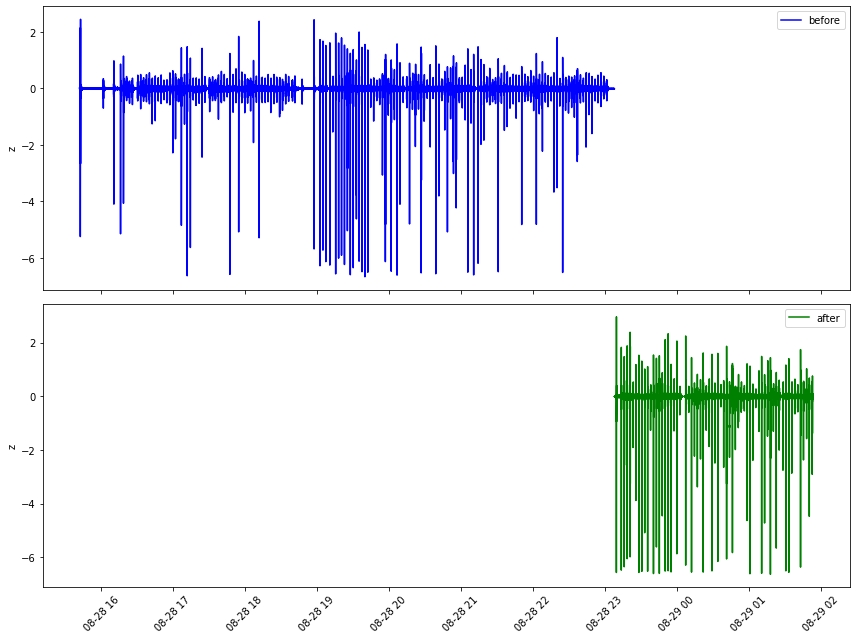

In [31]:
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

ax3.plot(before_2308['Time'], before_2308['z'], label='before', color='blue')
ax3.set_ylabel('z')
ax3.legend()

ax4.plot(after_2308['Time'], after_2308['z'], label='after', color='green')
ax4.set_ylabel('z')
ax4.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
before_1542['z'].describe()

count    738744.000000
mean         -0.007046
std           0.294400
min          -6.663580
25%          -0.008105
50%          -0.006989
75%          -0.005719
max           2.897751
Name: z, dtype: float64

In [33]:
after_1542['z'].describe()

count    2.678700e+06
mean    -7.120572e-03
std      1.047540e-01
min     -6.668503e+00
25%     -8.163452e-03
50%     -7.086182e-03
75%     -5.929565e-03
max      2.450623e+00
Name: z, dtype: float64

In [34]:
before_2308['z'].describe()

count    2.678700e+06
mean    -7.120572e-03
std      1.047540e-01
min     -6.668503e+00
25%     -8.163452e-03
50%     -7.086182e-03
75%     -5.929565e-03
max      2.450623e+00
Name: z, dtype: float64

In [35]:
after_2308['z'].describe()

count    984038.000000
mean         -0.007216
std           0.162780
min          -6.633133
25%          -0.008316
50%          -0.007162
75%          -0.005887
max           2.957941
Name: z, dtype: float64

### 상관관계

In [16]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [19]:
xyz = data.iloc[:,1:]
xyz

,x,y,z
0,-0.008282,-0.007571,-0.007034
1,-0.007666,-0.005618,-0.006488
2,-0.007770,-0.004584,-0.006766
3,-0.007492,-0.005890,-0.006854
4,-0.007516,-0.006842,-0.007455
...,...,...,...
8839006,-0.008926,-0.007025,-0.011603
8839007,-0.008154,-0.005743,0.049307
8839008,-0.008026,-0.006183,-0.029788
8839009,-0.006598,-0.007840,-0.021387


In [20]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(xyz), columns=xyz.columns)

print("\nMin-Max Scaling 결과:\n", scaled_df)


Min-Max Scaling 결과:
                 x         y         z
0        0.454668  0.456353  0.659072
1        0.472873  0.526276  0.659126
2        0.469809  0.563313  0.659099
3        0.478010  0.516552  0.659090
4        0.477289  0.482465  0.659031
...           ...       ...       ...
8839006  0.435652  0.475910  0.658621
8839007  0.458453  0.521796  0.664634
8839008  0.462239  0.506064  0.656826
8839009  0.504416  0.446739  0.657656
8839010  0.460887  0.467169  0.660108

[8839011 rows x 3 columns]


In [21]:
correlation_matrix = scaled_df.corr(method='pearson')

print("\nPearson 상관계수 행렬:\n", correlation_matrix)


Pearson 상관계수 행렬:
           x         y         z
x  1.000000  0.002093  0.001899
y  0.002093  1.000000  0.002964
z  0.001899  0.002964  1.000000


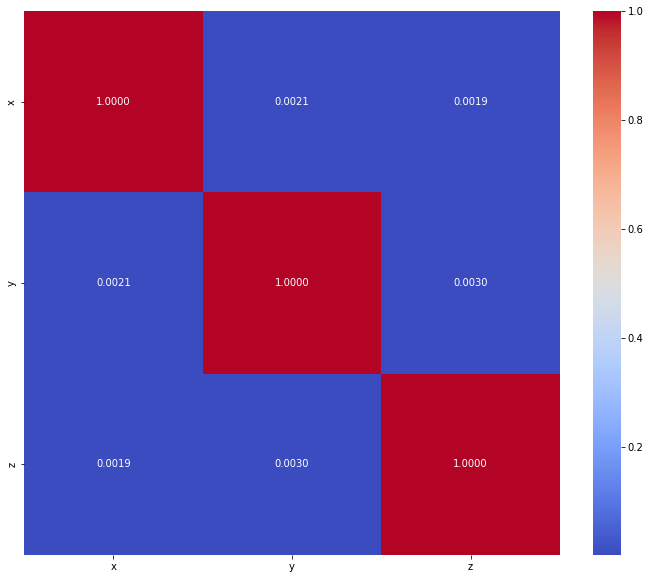

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.show()